<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-proyecto-equipo-149/blob/main/Reduccion_dimensiones_A01793468.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Actividad Semanal 5 Repaso Transformación y reducción de dimensiones
### Estudiante: Carlos Gustavo Lopez - A01793468
### Materia: Ciencia de Datos
### Profesor: Phd. María de la Paz Rico
### Fecha: 26 de octubre de 2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [3]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D - eigenvalues
print(vectors) #W - eigenvectors

#Ejemplo de reconstrucción

#empleamos np.linalg.eig(A) para devolver los eigen values y eigenvectors de A
values, vectors = np.linalg.eig(A)

W = vectors

#Winv contiene la matriz invertida
Winv = np.linalg.inv(W)

# D contiene el arregle diagonal de los eigenvalues
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#B se calcula realizando la proyección mediante un doble producto punto: el de los arreglos W Y D y del resultante con la Winv
B = np.dot(np.dot(W,D), Winv)
print(B.round(2).real)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [9]:
# Matriz 1
A = array([[5, 4, 0], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)

print("-------Matriz original-------")
print(A)
print("-----------------------------")
print("-------eigenvalues de A-------")
print(values) #D
print("-------eigenvectors de A-------")
print(vectors) #W

#Reconstrucción

#empleamos np.linalg.eig(A) para devolver los eigen values y eigenvectors de A
values, vectors = np.linalg.eig(A)

W = vectors

#Winv contiene la matriz invertida
Winv = np.linalg.inv(W)

# D contiene el arregle diagonal de los eigenvalues
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
#B se calcula con un doble producto punto: el de los arreglos W Y D y del resultante con la Winv
B = np.dot(np.dot(W,D), Winv)
print(B.round(2).real)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------eigenvalues de A-------
[ 6.70156212 -1.          0.29843788]
-------eigenvectors de A-------
[[ 0.9180404  -0.51214752  0.43901573]
 [ 0.39052569  0.76822128 -0.51601493]
 [ 0.06849451 -0.38411064  0.73552279]]
-------Matriz reconstruida-------
[[ 5.  4.  0.]
 [ 3. -0. -2.]
 [ 0.  1.  1.]]
-----------------------------


In [10]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
values, vectors = eig(A)

print("-------Matriz original-------")
print(A2)
print("-----------------------------")
print("-------eigenvalues de A2-------")
print(values) #D
print("-------eigenvectors de A2-------")
print(vectors) #W

#Reconstrucción

#empleamos np.linalg.eig(A) para devolver los eigen values y eigenvectors de A
values, vectors = np.linalg.eig(A2)

W = vectors

#Winv contiene la matriz invertida
Winv = np.linalg.inv(W)

# D contiene el arregle diagonal de los eigenvalues
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
#B se calcula con un doble producto punto: el de los arreglos W Y D y del resultante con la Winv
B = np.dot(np.dot(W,D), Winv)
print(B.round(2).real)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------eigenvalues de A2-------
[ 6.70156212 -1.          0.29843788]
-------eigenvectors de A2-------
[[ 0.9180404  -0.51214752  0.43901573]
 [ 0.39052569  0.76822128 -0.51601493]
 [ 0.06849451 -0.38411064  0.73552279]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [11]:
#Matriz 3
A3 = array([[1, 3, 8], [1, 0, 1], [10, 7, 1]])
values, vectors = eig(A)

print("-------Matriz original-------")
print(A3)
print("-----------------------------")
print("-------eigenvalues de A3-------")
print(values) #D
print("-------eigenvectors de A3-------")
print(vectors) #W

#Reconstrucción

#empleamos np.linalg.eig(A) para devolver los eigen values y eigenvectors de A
values, vectors = np.linalg.eig(A3)

W = vectors

#Winv contiene la matriz invertida
Winv = np.linalg.inv(W)

# D contiene el arregle diagonal de los eigenvalues
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
#B se calcula con un doble producto punto: el de los arreglos W Y D y del resultante con la Winv
B = np.dot(np.dot(W,D), Winv)
print(B.round(2).real)
print("-----------------------------")

-------Matriz original-------
[[ 1  3  8]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
-------eigenvalues de A3-------
[ 6.70156212 -1.          0.29843788]
-------eigenvectors de A3-------
[[ 0.9180404  -0.51214752  0.43901573]
 [ 0.39052569  0.76822128 -0.51601493]
 [ 0.06849451 -0.38411064  0.73552279]]
-------Matriz reconstruida-------
[[ 1.  3.  8.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


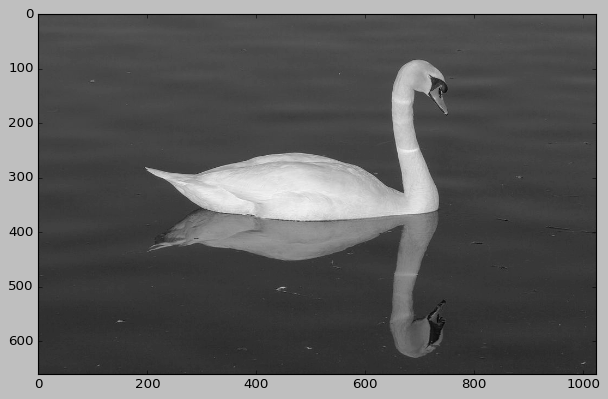

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F403CFE8F50>


In [20]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [28]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [22]:
U.shape

(660, 660)

In [23]:
V.shape

(1024, 1024)

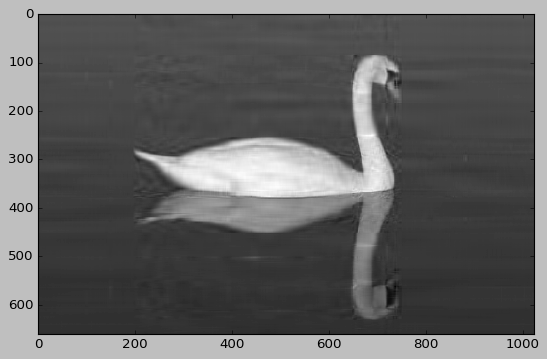

Felicidades la imagen está comprimida


In [41]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 20
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

#Conclusiones
#con nvalue de 50 se ve practicamente igual que 660
#para que se vea sin lugar a dudas que es un cisne, sin que se vea muy borroso, se necesita como mínimo un nvalue de 20 

¡Ahora es tu turno!, comprime 3 imagenes

[ 96.  92.  89. ...  95.  98. 100.]


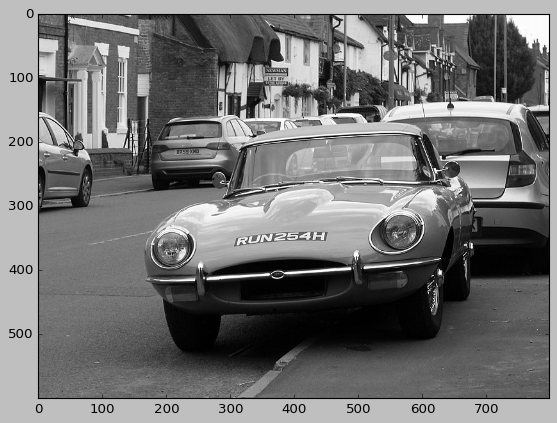

<PIL.Image.Image image mode=LA size=799x600 at 0x7F403C63EE90>


In [74]:
#imagen 1
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/E-type_Jaguar_%2811859126664%29.jpg/799px-E-type_Jaguar.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [75]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(600, 799)

In [76]:
U.shape

(600, 600)

In [77]:
V.shape

(799, 799)

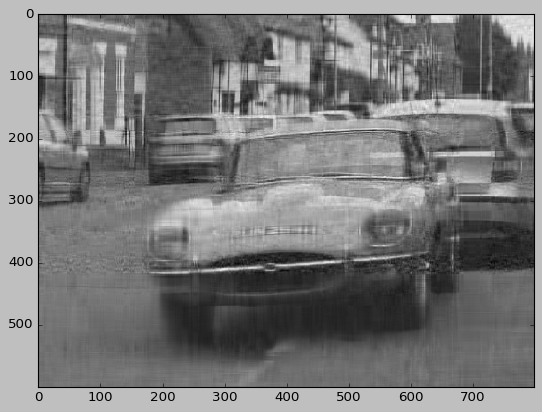

Felicidades la imagen está comprimida


In [78]:
#Cuantos valores crees que son necesarios?

nvalue = 30
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

#Conclusiones
#con nvalue de 20 la imagen se ve mucho mas borrosa que el cisne
#se requiere nvalue de mínimo 30

[73. 74. 78. ... 85. 85. 77.]


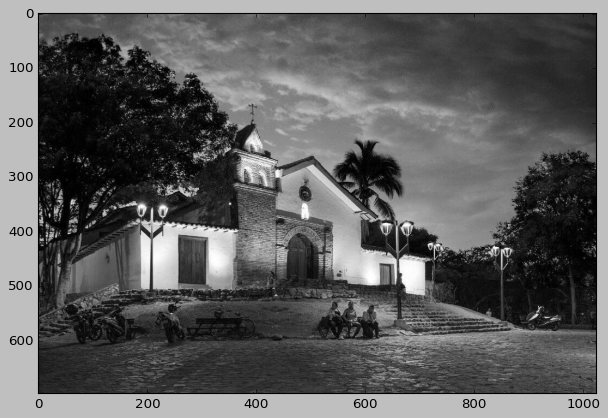

<PIL.Image.Image image mode=LA size=1024x696 at 0x7F403C45DA50>


In [79]:
#imagen 2

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Finvoyager.com%2Fwp-content%2Fuploads%2FCapilla-de-San-Antonio-1024x696.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [80]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(696, 1024)

In [81]:
U.shape

(696, 696)

In [82]:
V.shape

(1024, 1024)

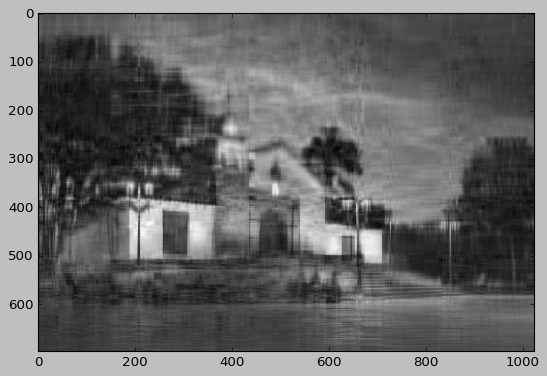

Felicidades la imagen está comprimida


In [85]:
#Cuantos valores crees que son necesarios?

nvalue = 20
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

#Conclusiones
#con nvalue de 20 la imagen la imagen de la capilla de san antonio es reconocible

[ 96.  98. 102. ...  85.  83.  83.]


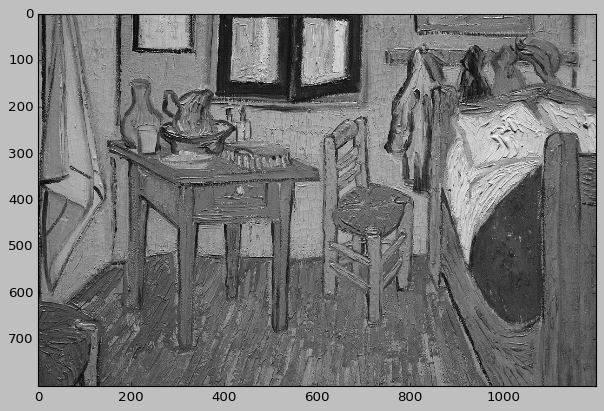

<PIL.Image.Image image mode=LA size=1200x800 at 0x7F403C563510>


In [86]:
#imagen 3
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2F5%2F50%2FVincent_Van_Gogh%252C_La_stanza_di_van_gogh_ad_arles%252C_1889%252C_03.JPG%2F1200px-Vincent_Van_Gogh%252C_La_stanza_di_van_gogh_ad_arles%252C_1889%252C_03.JPG&f=1&nofb=1&ipt=d662375fe704222227ae5c2002d2abb9ed1a3ea0770c7c2963667ad245727bfe&ipo=images')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [87]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(800, 1200)

In [88]:
U.shape

(800, 800)

In [89]:
V.shape

(1200, 1200)

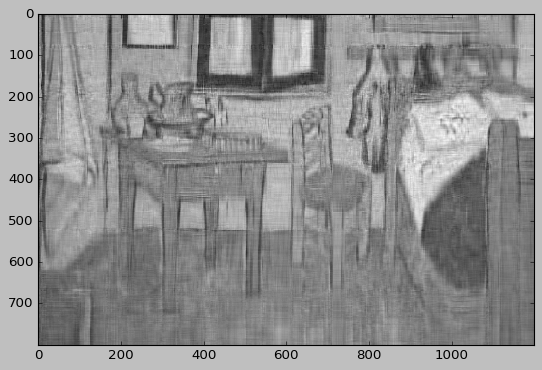

Felicidades la imagen está comprimida


In [91]:
#Cuantos valores crees que son necesarios?

nvalue = 30
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

#Conclusiones
#Van Gogh podría se sentiría cómodo en su cuarto con un nvalue mínimo de 30

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Carga de datos
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score de las características
scaler = StandardScaler() ##standard score: Estandariza las características removiendo la media y escalando a la varianza unitaria
scaler.fit(X) #Computa la media y la desv estandar
X = scaler.transform(X) #Realiza la estandarización mediante el centrado y escalado de X
# Modelo PCA
pca = PCA(n_components=2) # Calcula 2 componentes principales
X_new = pca.fit_transform(X) # Proyecta los datos originales en el espacio PCA. Ajusta la trnasformación a  X y Y 

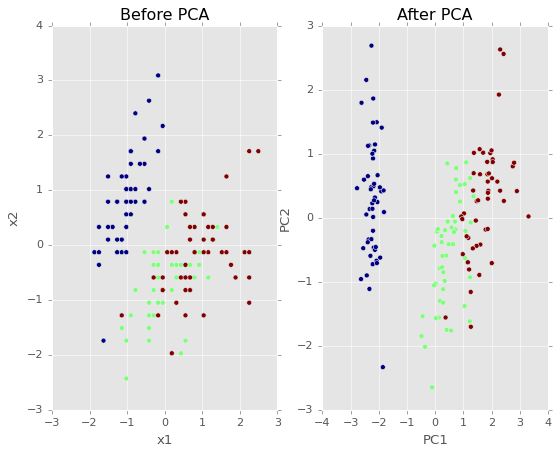

In [93]:
# Traza de los datos antes y después de la transfomación PCA
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [100]:
#Se aplica pca.explained_variance_ratio_ para conocer que tanta varianza aportan PC1 y PC2 (73% y 22% para un total de 95%)
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [99]:
#Se estima la matriz de covarianza de la matriz PCA para realizar la prueba de máxima varianza
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [98]:
#Se aplica pca.explained_variance_ para conocer la varianza de PC1 y PC2. nótese que coincide con los valores de la diagonal de la prueba mázima de varianza
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [101]:
#Se aplica pca.components para identificar la importancia de cada característica (valores absolutos de los eigenvectors)
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [102]:
#Se define función biplot para visualizar en una sola gráfica toda la información PCA: características de los PCs
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

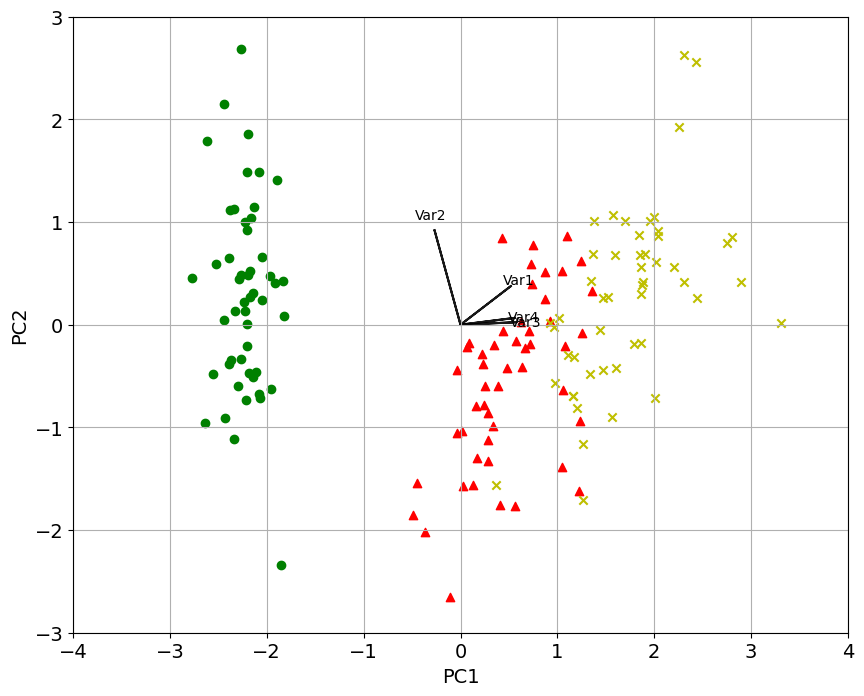

In [103]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Se realiza el llamado de la función biplot para PC1 y PC2
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [106]:
# Variables 3 y 4 se encuentran altamente correlacionadas (96%)
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [105]:
# Variables 2 y 3 tienen correlación negativa (-42%)
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Se evidenció que PCA consiste en transformar los datos en series de datos no correlacionados que se encuentran en un espacio comprimido, generalmente entre 2 o 3 componentes, cuya proyección contiene la máxima varianza y son, por tanto, los más representativos.

Este método es útil para simplificar el trabajo con datasets que tienen múltiples variables, puesto que nos permite identificar los 2 o 3 componentes principales (los más representivos) y seguir trabajando solo con estos, reduciendo tiempo de análisis y espacio ocupado por los datos.

En la primera gráfica apreciamos cmo la varianza se maximizó en el componente principal 1 y 2.

Al aplicar pca.explained_variance_ratio_ y pca.explained_variance_ se vio como PC1 explica el 73% de la varianza y PC2 explica el 22% de la varianza. Ambos representan el 95% de la varianza. Por eso son los más significativos.

Posteiormente se realizó el análisis de los componentes haciendo uso de la función pca.components. Este análisis permitió identificar las características más importantes para PC1 (las que aportan mayor al PC): las 1, 3 y 4. Para PC2 fueron las características 1 y 2.

Graficar las características con un biplot permitió identificar visualmente la correlación entre las características. En el ejercicio: las variables 3 y 4 se encuentran altamente correlacionadas (96%) y en contraste las variables 2 y 3 tienen una correlación negativa.
